# Plotting with seaborn

In this notebook, we will explore our data further using seaborn for some fancy plotting. Based on these insights, we will do some exploratory statistical analysis later.

In [38]:
import numpy, pandas
import matplotlib.pyplot as pl
import seaborn
%matplotlib inline

seaborn.set_style("white")
seaborn.set(rc={'figure.figsize':(12,8)})

In [2]:
dataset = pandas.read_csv("final_dataset.csv")

dataset.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,FL_DATE,OP_UNIQUE_CARRIER,AIRLINE_NAME,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT
0,2019,2019-10-13,AS,Alaska Airlines Inc.,N524VA,LAS,"Las Vegas, NV",NV,LAX,"Los Angeles, CA",...,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,2019-10-13,AS,Alaska Airlines Inc.,N521VA,SEA,"Seattle, WA",WA,SNA,"Santa Ana, CA",...,978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,2019-10-13,AS,Alaska Airlines Inc.,N529VA,BUR,"Burbank, CA",CA,SEA,"Seattle, WA",...,937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,2019-10-13,AS,Alaska Airlines Inc.,N528VA,PDX,"Portland, OR",OR,PSP,"Palm Springs, CA",...,873.0,0.0,0.0,29.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019,2019-10-13,AS,Alaska Airlines Inc.,N529VA,SEA,"Seattle, WA",WA,BUR,"Burbank, CA",...,937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(dataset.shape)

col_names = dataset.columns

print(col_names)

(692944, 29)
Index(['YEAR', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'AIRLINE_NAME', 'TAIL_NUM',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DIV_REACHED_DEST',
       'DIV_ARR_DELAY', 'DIV_DISTANCE', 'DIV1_AIRPORT'],
      dtype='object')


## 1. Scatter plots

Let's start with a scatter plot, which we saw in the previous chapter using built-in `pandas` methods.

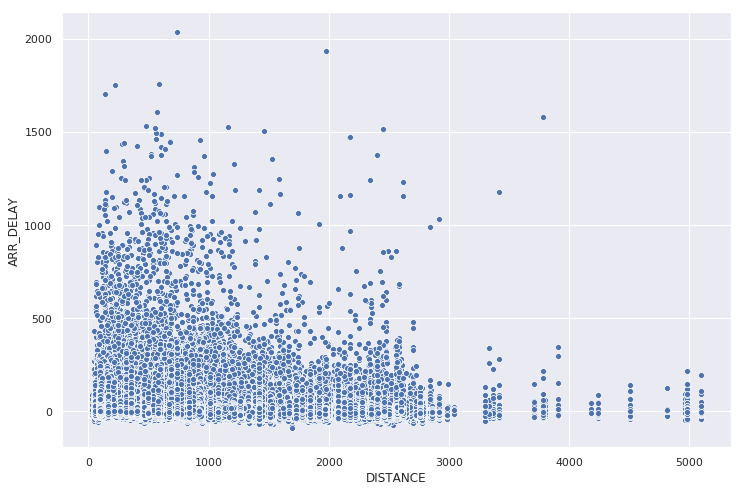

In [39]:
seaborn.scatterplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset)

pl.show()

We can represent a third dimension of information in the above plot!

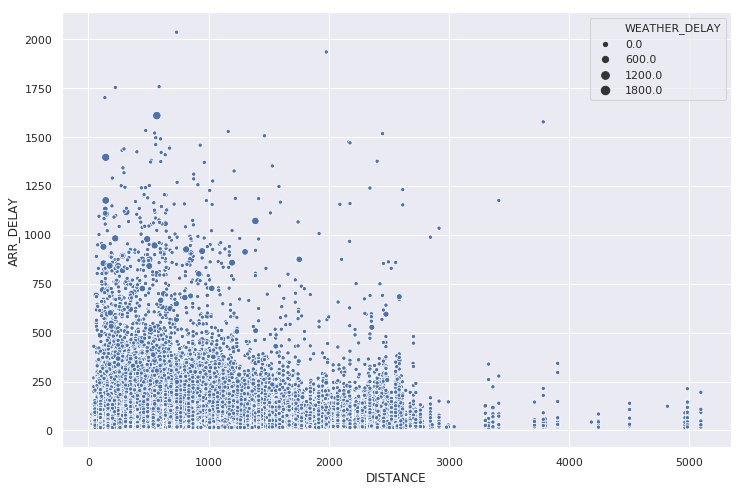

In [40]:
seaborn.scatterplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset, size = 'WEATHER_DELAY')

pl.show()

We can add a fourth dimesion by using colors on this plot

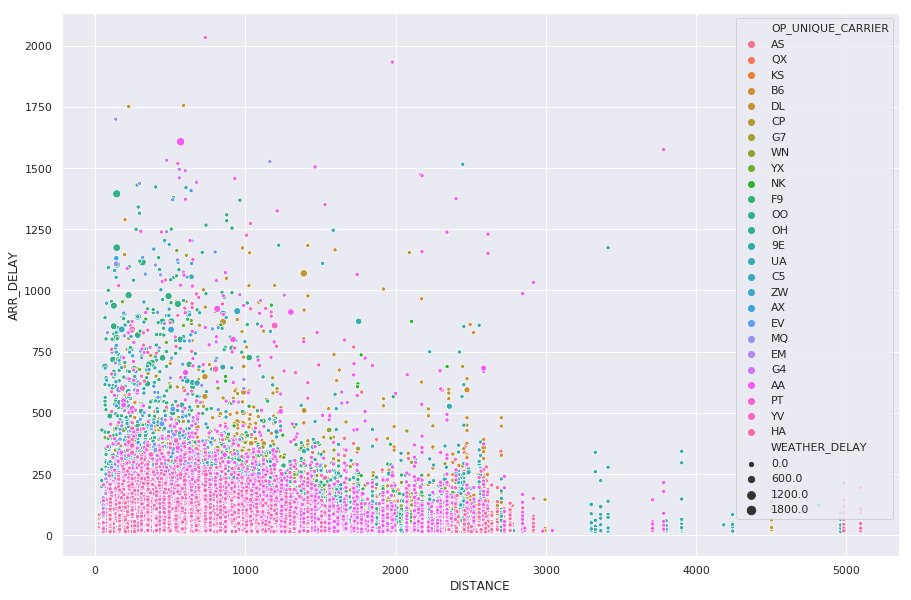

In [41]:
pl.figure(figsize = (15, 10))

seaborn.scatterplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset, 
                    size = 'WEATHER_DELAY', hue = 'OP_UNIQUE_CARRIER')

pl.show()

# 2. Distplot and histogram

We can make histograms, as well as fit them with a kernel density estimation (KDE) method built into seaborn. Unfortunately, there is no way to extract this fit from seaborn as of now.

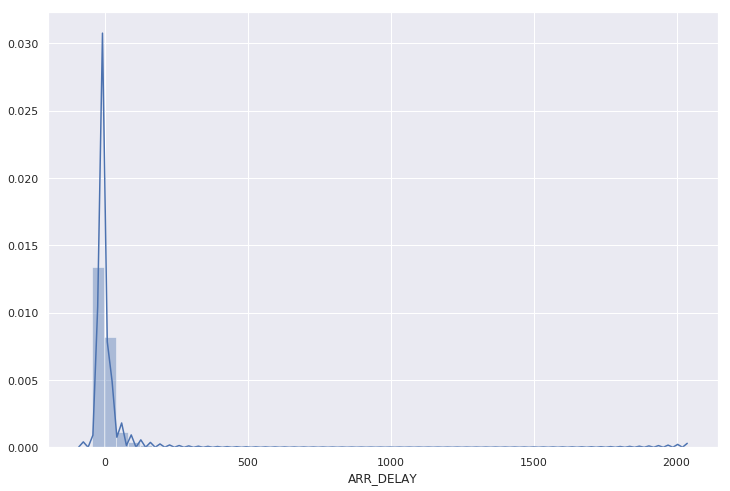

In [42]:
#The function to produce a distplot does not like NaNs, so let's get rid of them!

interest_var = dataset['ARR_DELAY'][dataset['ARR_DELAY'].notna()]

seaborn.distplot(interest_var,)

pl.show()

# 3. Jointplots

Seaborn has a nifty way to make and display both of the above plots together for a complete representation of the data.

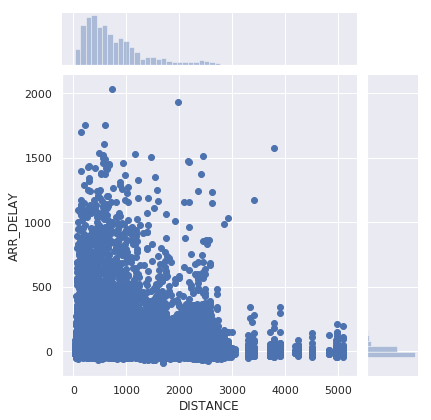

In [43]:
seaborn.jointplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset)

pl.show()

We can modify the `kind=` kw to make a different representation:

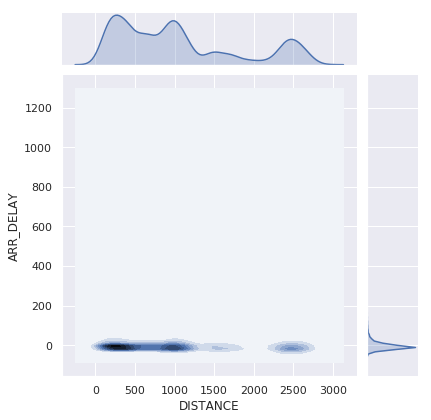

In [44]:
#Taking a subset, since whole dataset takes a while
seaborn.jointplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset.iloc[:int(50e3), :],
                 kind = 'kde')

pl.show()

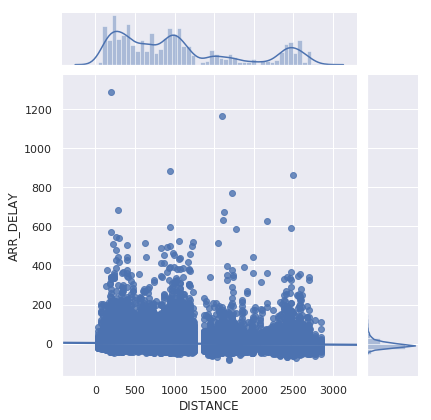

In [45]:
#Taking a subset, since whole dataset takes a while
seaborn.jointplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset.iloc[:int(50e3), :],
                 kind = 'reg')

pl.show()

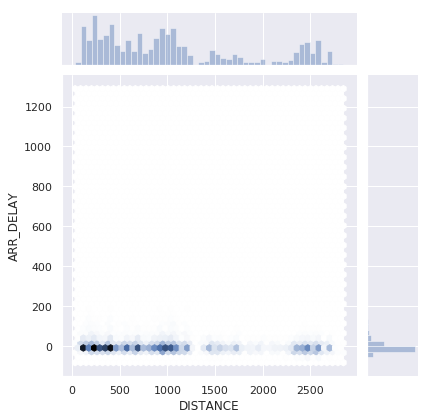

In [46]:
#Taking a subset, since whole dataset takes a while
seaborn.jointplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset.iloc[:int(50e3), :],
                 kind = 'hex')

pl.show()

# 4. Categorical plots

Given a dataset that can be categorized in different categories (like this dataset), seaborn offers a large range of plots to investigate the categories individually.


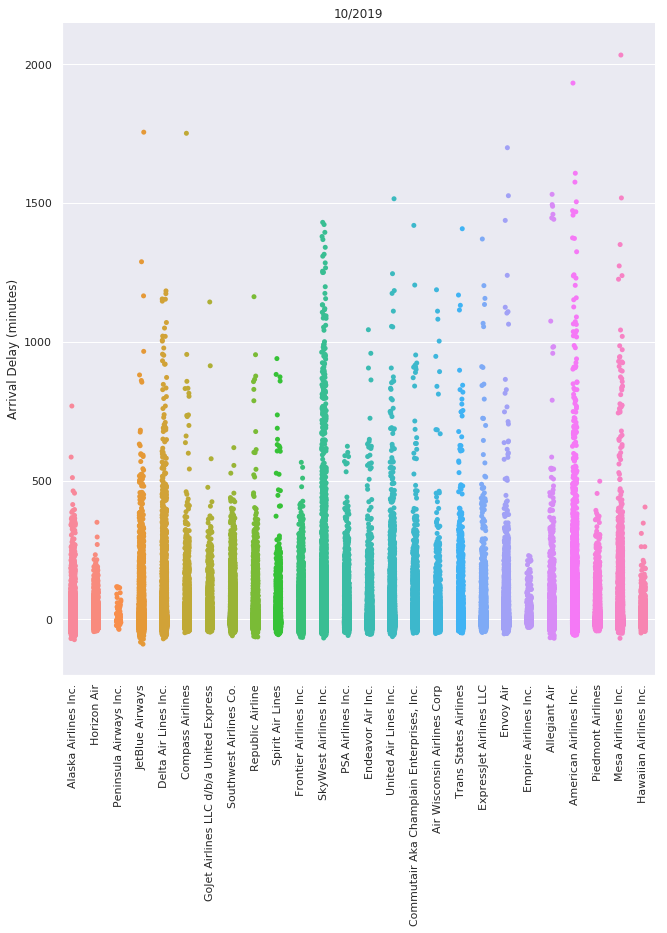

In [65]:
myplot = seaborn.catplot(x = 'AIRLINE_NAME', y = 'ARR_DELAY', data = dataset, height = 10,)

pl.xlabel("")
pl.ylabel("Arrival Delay (minutes)")
pl.title("10/2019")

pl.xticks(rotation = 90)

pl.show()

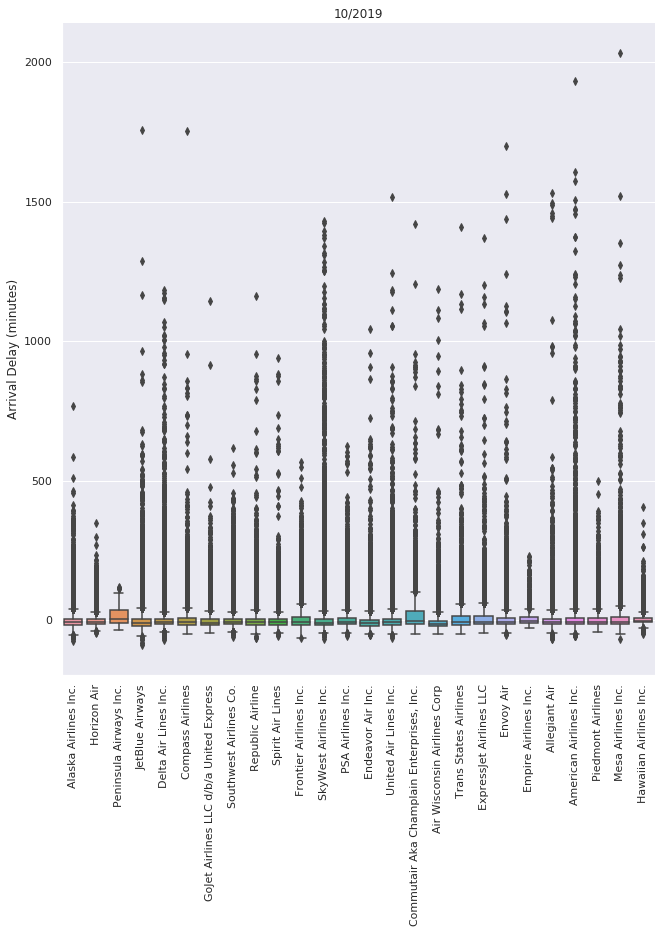

In [57]:
seaborn.catplot(x = 'AIRLINE_NAME', y = 'ARR_DELAY', data = dataset, height = 10,
               kind = 'box')

pl.xlabel("")
pl.ylabel("Arrival Delay (minutes)")
pl.title("10/2019")

pl.xticks(rotation = 90)

pl.show()

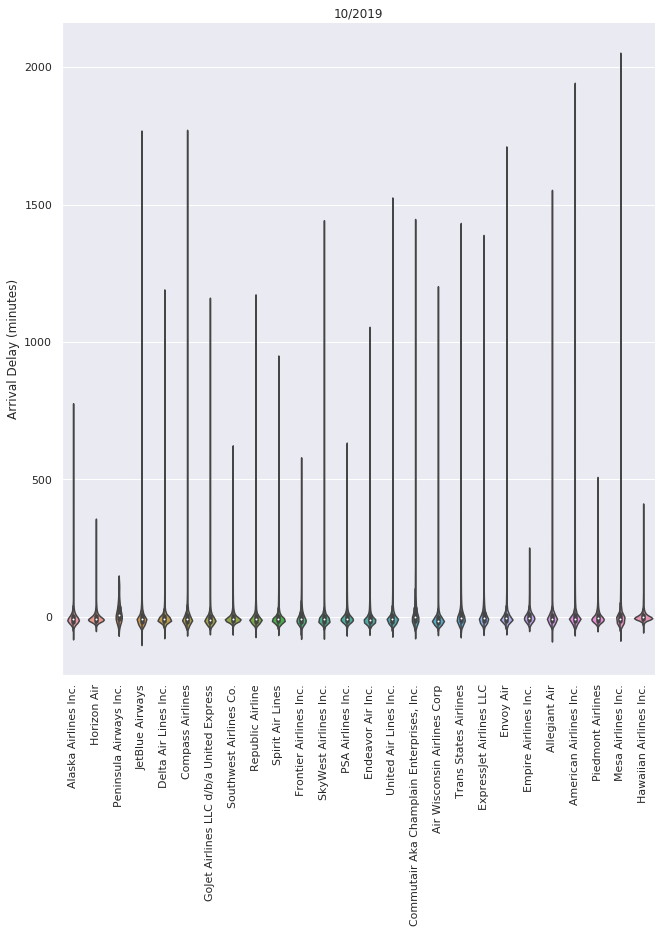

In [58]:
seaborn.catplot(x = 'AIRLINE_NAME', y = 'ARR_DELAY', data = dataset, height = 10,
               kind = 'violin')

pl.xlabel("")
pl.ylabel("Arrival Delay (minutes)")
pl.title("10/2019")

pl.xticks(rotation = 90)

pl.show()

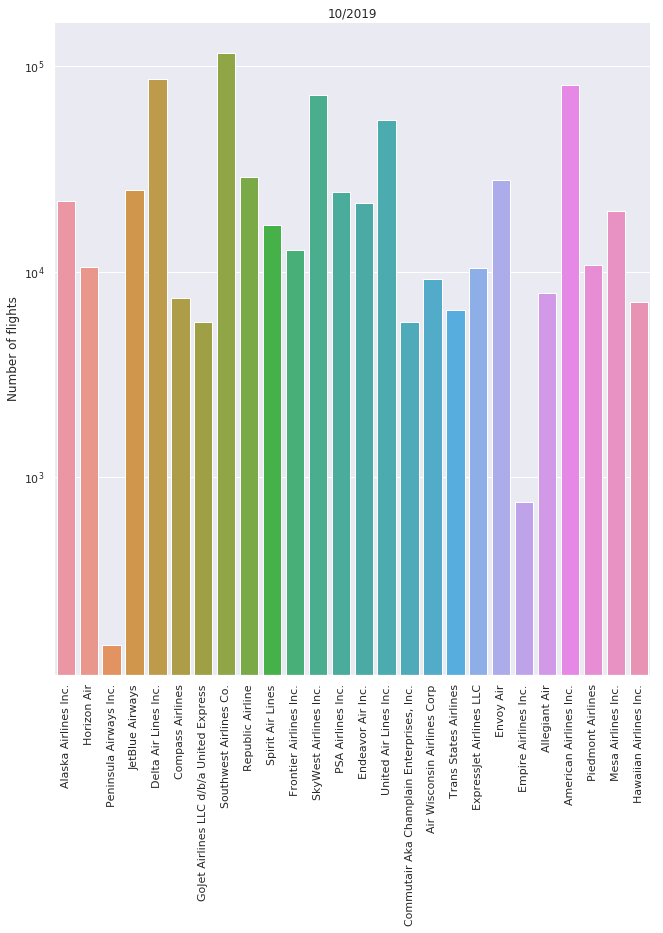

In [63]:
seaborn.catplot(x = 'AIRLINE_NAME', data = dataset, height = 10,
               kind = 'count')

pl.yscale('log')

pl.xlabel("")
pl.ylabel("Number of flights")
pl.title("10/2019")


pl.xticks(rotation = 90)

pl.show()

# 5. Visualizing regression fits to data

Seaborn offers functionality where it uses `scipy.statsmodels` under the hood to produce linear regression fits to the data and plot the results together.

**Note**: Seaborn is a visualization library and thus, does not return the best-fit model from its fitting routines.

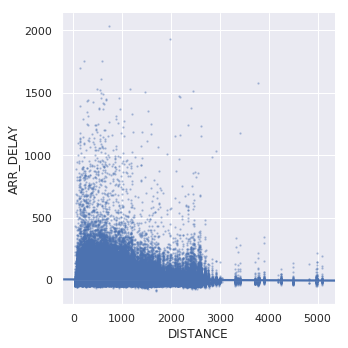

In [68]:
seaborn.lmplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset, scatter_kws = {'s': 2, 'alpha': 0.3})

pl.show()

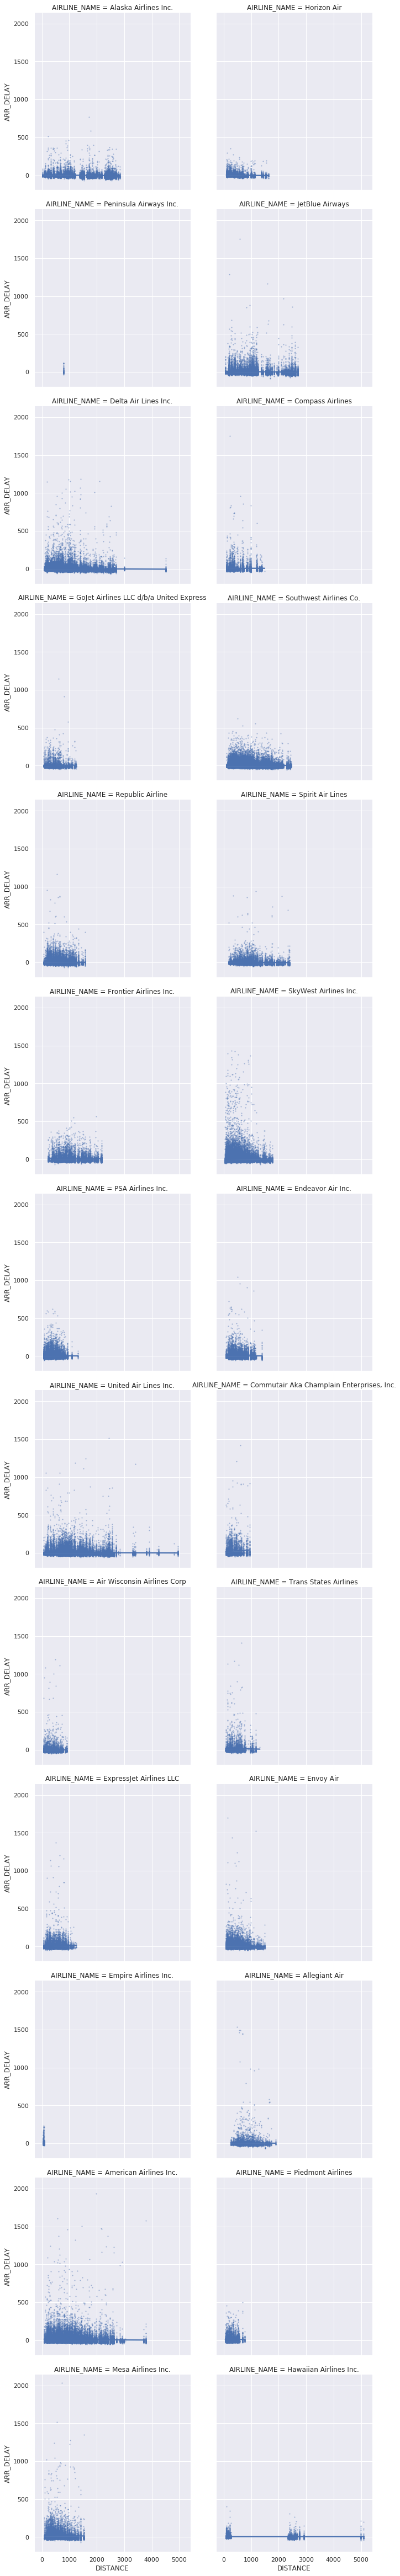

In [74]:
#Let's split the data up by airlines, with each airline in its own cell:
seaborn.lmplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset, truncate = True,
               col = 'AIRLINE_NAME', col_wrap = 2,
               scatter_kws = {'s': 2, 'alpha': 0.3})

pl.show()

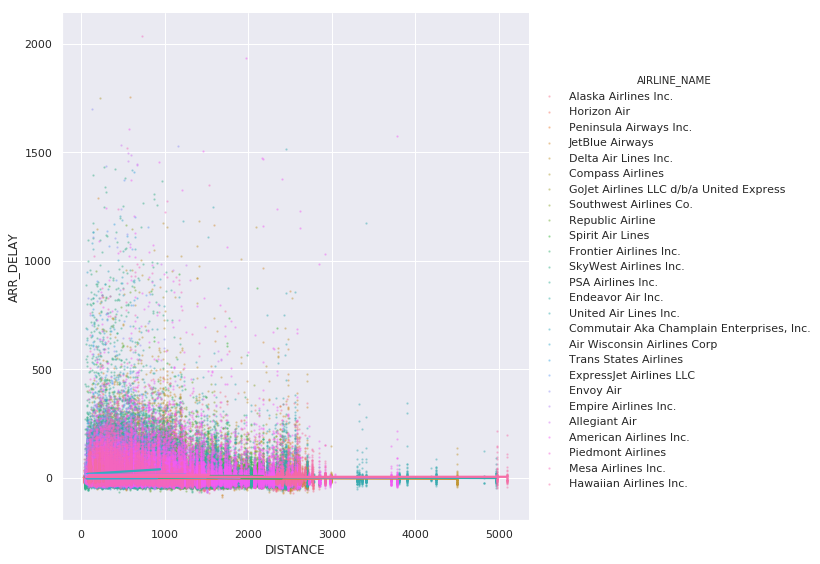

In [75]:
#Let's split the data up by airlines, with each airline in its own cell:
seaborn.lmplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset, truncate = True,
               hue = 'AIRLINE_NAME',
               height = 8,
               scatter_kws = {'s': 2, 'alpha': 0.3})

pl.show()

# 6. Line plots

Finally, let's look at how to make line plots with seaborn

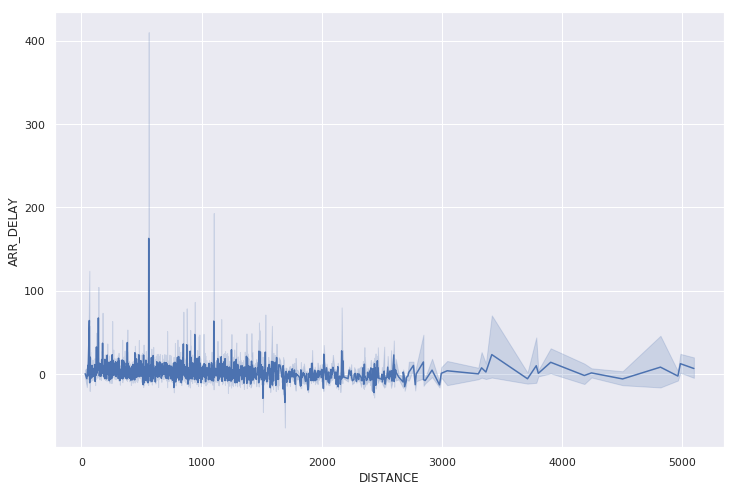

In [78]:
seaborn.lineplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset)

pl.show()

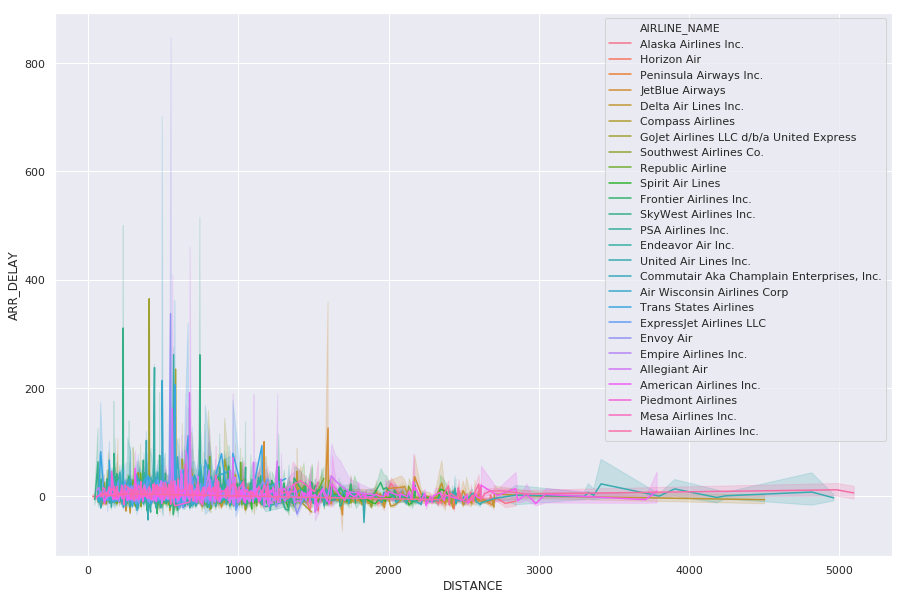

In [83]:
pl.figure(figsize = (15, 10))

seaborn.lineplot(x = 'DISTANCE', y = 'ARR_DELAY', data = dataset,
                hue = 'AIRLINE_NAME')

pl.show()

We have barely scratched the surface with the diversity of plots that we can produce in Seaborn. Interested users are urged to check out the full documentation and example gallery of Seaborn [at this link](https://seaborn.pydata.org/index.html).